In [2]:
hddigbrvliljeifgfnvhnvnetrhcvtve%local-changes

I0905 162310.938 local_changes_provider.py:32] Initializing local changes support for repo_base_path='/data/sandcastle/boxes/fbsource'


W0905 162317.282 local_changes_magic.py:256] 
___________ Recommended Action ___________ 
Your current repo doesn't match the kernel commit.
While autoreload often functions as expected, ensuring consistency is key,
especially when your local repo significantly diverges from the kernel commit or you're tackling production workflows.
Consider one of the following options:

1) From commandline, run: hg checkout 23125c9de1ee06aece0c03b253603b5590ea40bf to develop without building a local kernel.
2) To develop in your current repo, first build the local kernel(e.g, bento kernel build bento/kernels:bento_kernel_~). Afterwards, iterate development using %local-changes.
___________________________________________ 



W0905 162317.283 local_changes_magic.py:428] 
___________________ FYI __________________ 
A debugger is off. If you aim to debug, activate `%local-changes-debug` for advanced breakpoint capabilities in VS Code.
With the debugger, you can utilize breakpoints in VS Code.
Utilizing Bento in VS Code ensures a seamless debugging experience.
For further details, please refer to this Wiki(https://fburl.com/local-changes-debug).

Additionally, you can also debug cells in a notebook using the 'Debug Cell' feature with just one click.
For more information on how to debug a cell, please see this Wiki (https://fburl.com/debug-in-cell).
___________________________________________ 



W0905 162317.284 local_changes_magic.py:446] enabling autoreload (level 2)


I0905 162317.448 magics.py:89] %autoreload was called with parameter_s='2 aggressive_experimental'


Remapping module admarket.ads_copilot.common.training_simulation.bento_complexity_heatmap from /var/svcscm/.bento/kernels/bento_kernel_aria/148/bento_kernel_aria_binary-inplace#link-tree/admarket/ads_copilot/common/training_simulation/bento_complexity_heatmap.py to /data/sandcastle/boxes/fbsource/fbcode/admarket/ads_copilot/common/training_simulation/bento_complexity_heatmap.py


Remapping module admarket.ads_copilot.common.training_simulation.model_performance_api from /var/svcscm/.bento/kernels/bento_kernel_aria/148/bento_kernel_aria_binary-inplace#link-tree/admarket/ads_copilot/common/training_simulation/model_performance_api.py to /data/sandcastle/boxes/fbsource/fbcode/admarket/ads_copilot/common/training_simulation/model_performance_api.py
Remapping module admarket.ads_copilot.common.training_simulation.simple_interpolation from /var/svcscm/.bento/kernels/bento_kernel_aria/148/bento_kernel_aria_binary-inplace#link-tree/admarket/ads_copilot/common/training_simulation/simple_interpolation.py to /data/sandcastle/boxes/fbsource/fbcode/admarket/ads_copilot/common/training_simulation/simple_interpolation.py
📊 Model Parameters from API Configuration:
   Small Network: [128, 128] → 0.034M params
   Medium Network: [1024, 1024] → 2.109M params
   Large Network: [2048, 2048] → 8.413M params
🔥 Generating Performance Analysis...

📈 Creating Reference Model Curves (Sma

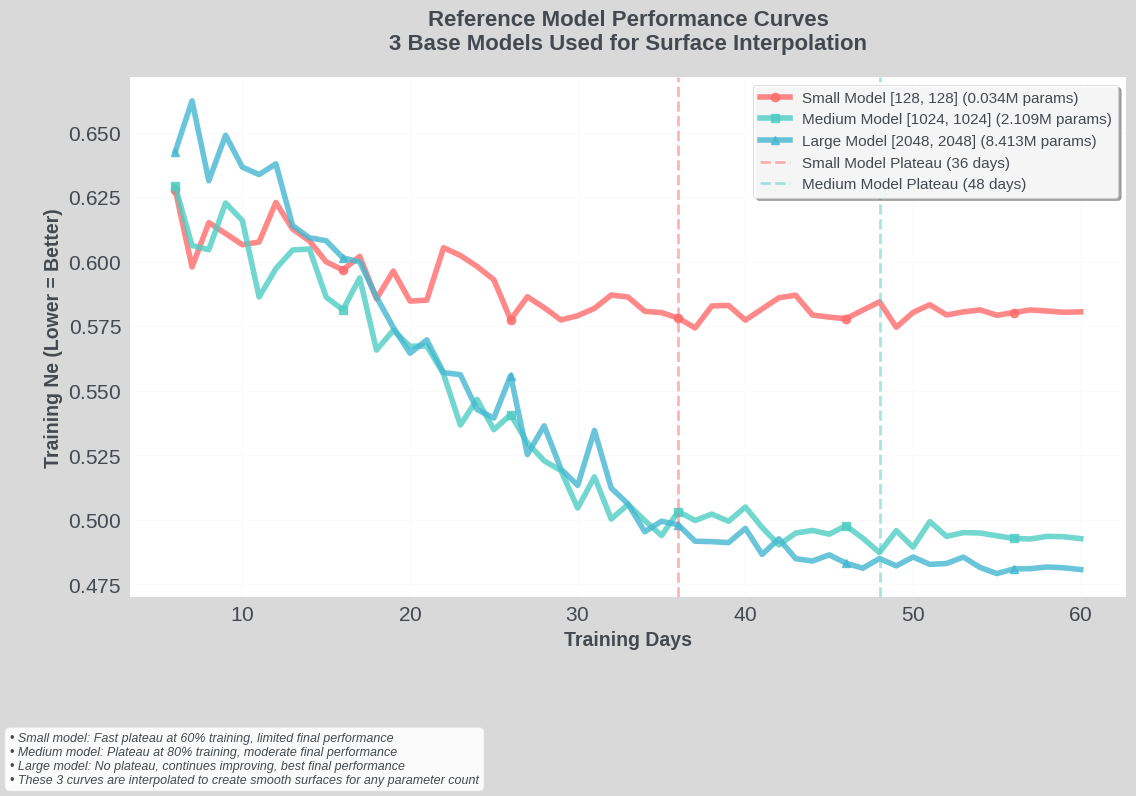


📐 Creating Clean Reference Model Curves (NO NOISE)...
📊 Graph - Clean Curves: Using noise_scale=0.0 (PURE MATHEMATICAL FUNCTIONS)
Calculating reference curves for training_ne using API function...
🎛️  Noise parameter: SMOOTH (noise_scale=0)
🎛️  Overriding API default noise scale with: 0.0
Day 6.0: Small=0.6092, Medium=0.6231, Large=0.6464
Day 7.0: Small=0.6079, Medium=0.6200, Large=0.6425
Day 8.0: Small=0.6064, Medium=0.6166, Large=0.6383
Day 9.0: Small=0.6049, Medium=0.6130, Large=0.6337
Day 10.0: Small=0.6033, Medium=0.6090, Large=0.6288


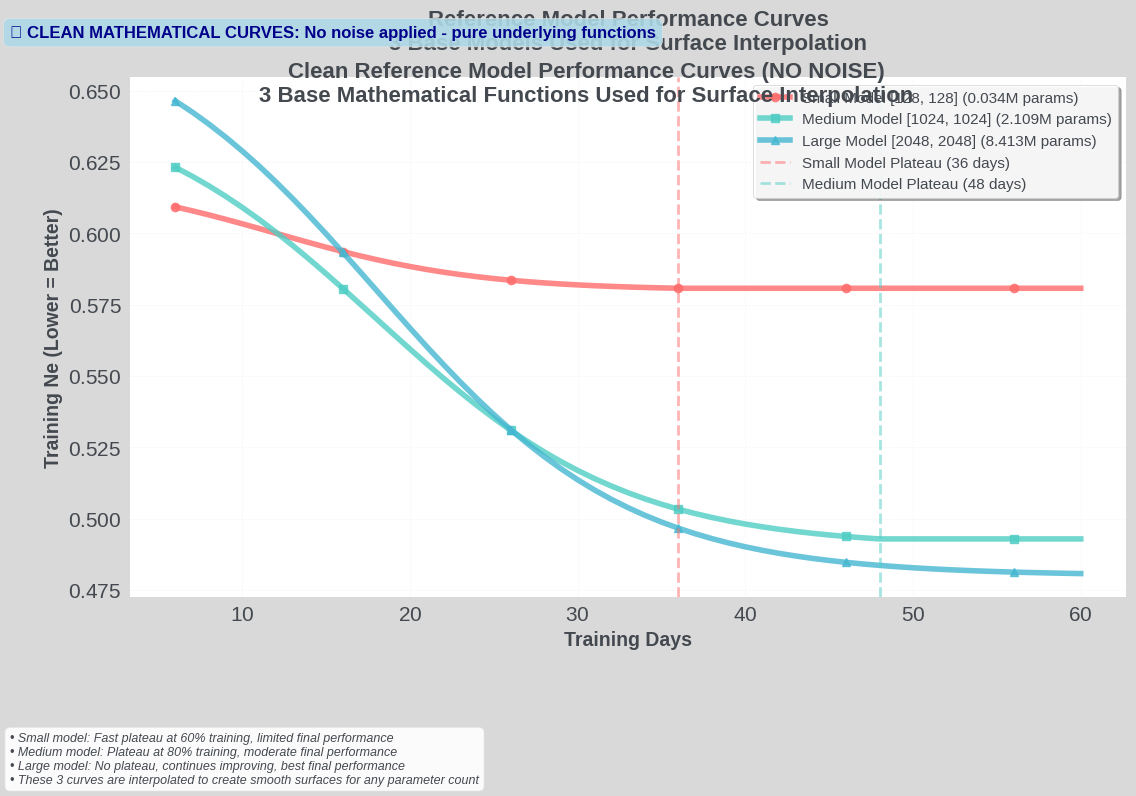


⚡ Creating 3D Surface Plot for QPS...
📊 Graph 3 - 3D QPS Surface: Using noise_scale=API_DEFAULT
Calculating 3D surface for qps using API function...
🎛️  Noise parameter: None
🎛️  Using API default noise scale: 0.02


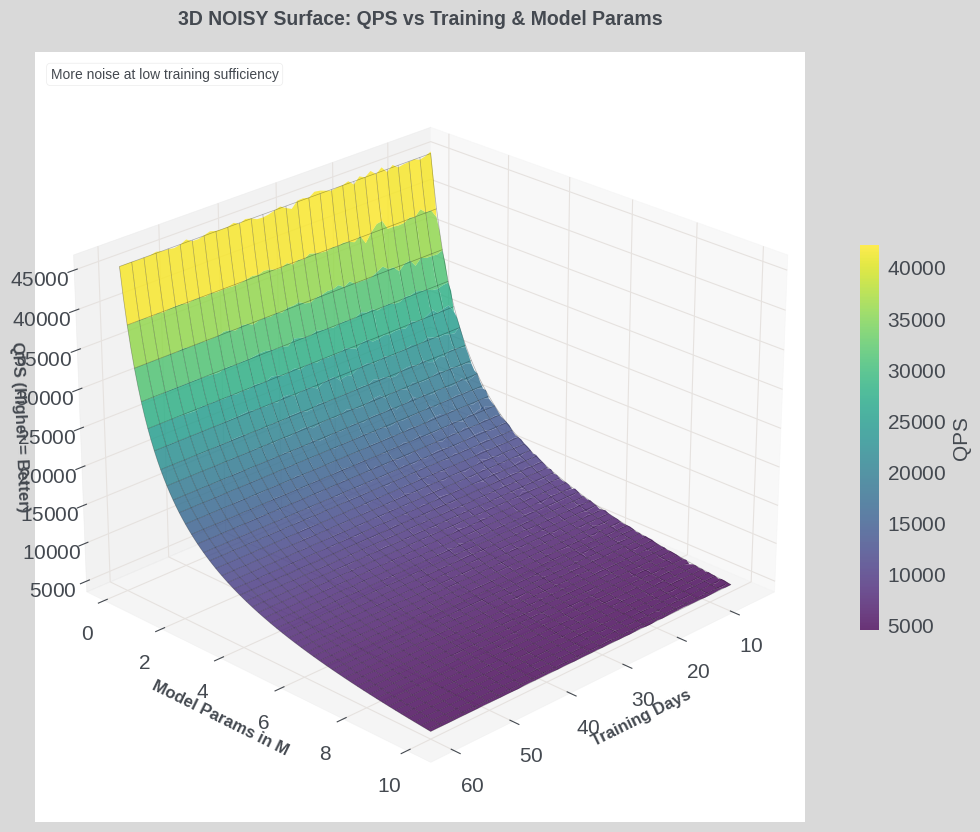


🎲 Creating 3D Surface Plot for Training NE...
📊 Graph 2 - 3D Training NE Surface: Using noise_scale=API_DEFAULT
Calculating 3D surface for training_ne using API function...
🎛️  Noise parameter: None
🎛️  Using API default noise scale: 0.02


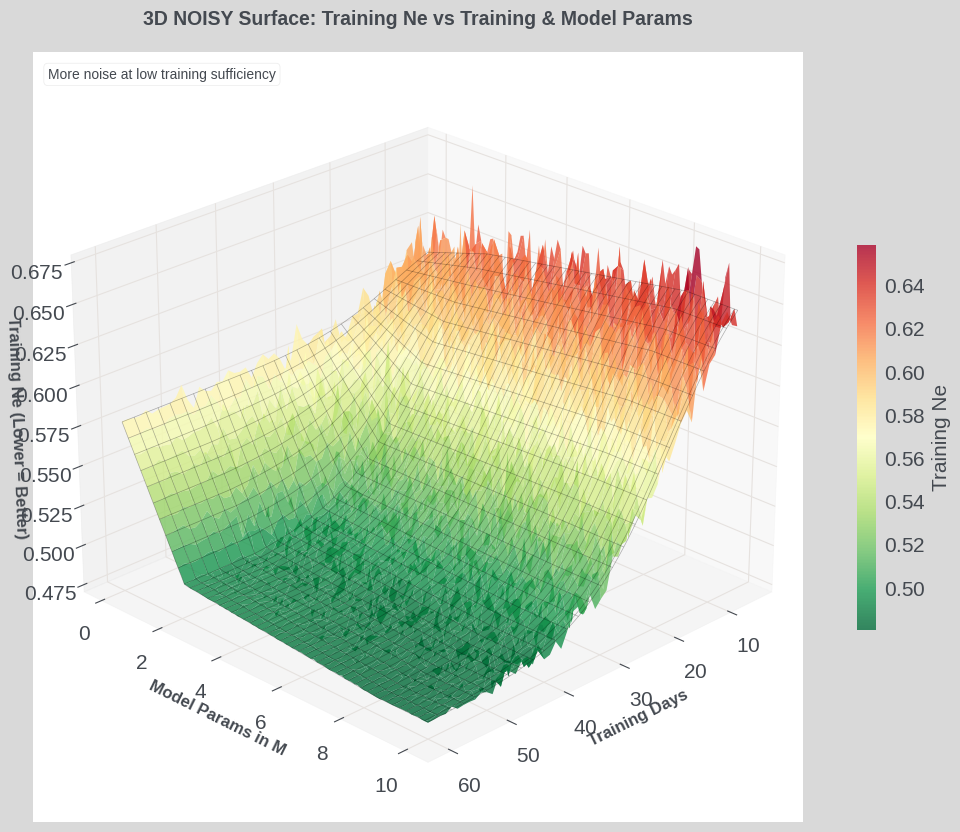


🎯 Creating Clean 3D Surface Plot for TRAINING_NE (NO NOISE)...
📊 Clean Training NE Surface: Using noise_scale=0.0 (PURE MATHEMATICAL SURFACE)
Calculating 3D surface for training_ne using API function...
🎛️  Noise parameter: 0.0
🎛️  Overriding API default noise scale with: 0.0


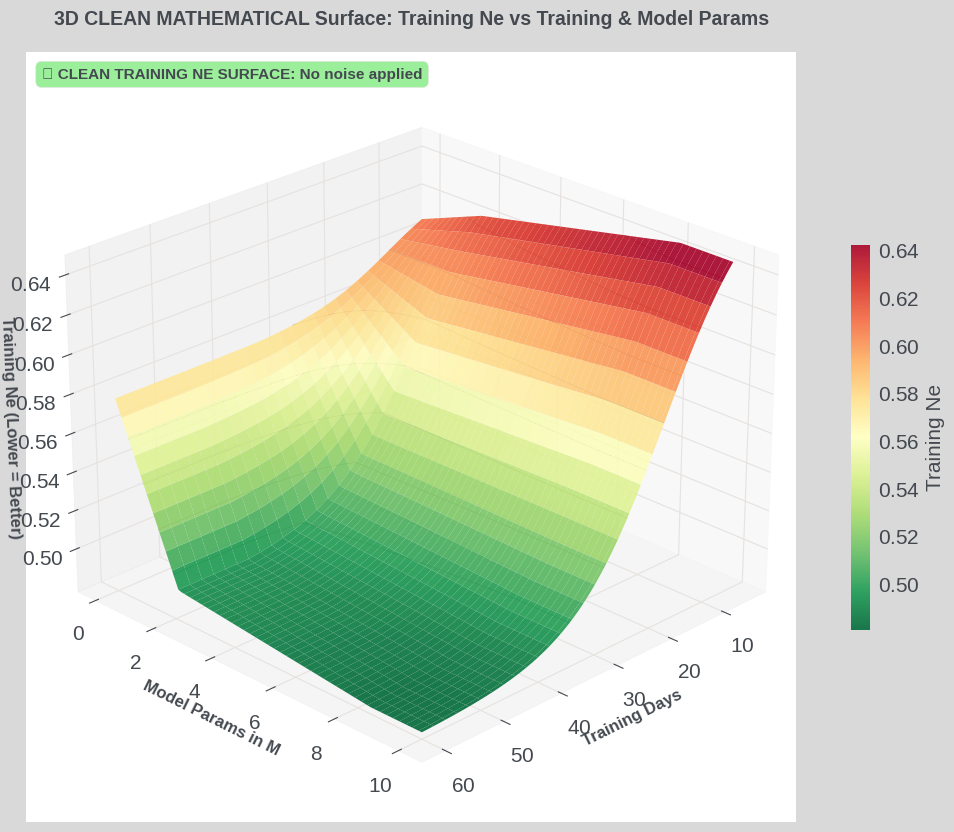


✅ All visualizations complete!

🔍 Key Observations:
• Reference Curves:
  - Small model plateaus early but has limited performance
  - Medium model plateaus later with moderate performance
  - Large model continues improving with best final performance
  - These 3 curves are interpolated for any parameter count
• Eval NE Surface:
  - Smooth base surface (black wireframe) shows interpolated performance
  - Colored surface adds realistic noise on top of smooth base
  - Noise is more pronounced at low training sufficiency
  - Lower values (green) are better performance
• QPS Surface:
  - Shows queries per second capability across model sizes
  - Smaller models have higher QPS (less computational cost)
  - Larger models have lower QPS but potentially better quality
  - Higher values (yellow) are better throughput


(<Figure size 1200x800 with 1 Axes>,
 <Figure size 1200x800 with 1 Axes>,
 <Figure size 1400x1000 with 2 Axes>,
 <Figure size 1400x1000 with 2 Axes>,
 <Figure size 1400x1000 with 2 Axes>)

In [3]:
from admarket.ads_copilot.common.training_simulation.bento_complexity_heatmap import main
main()

In [170]:
from admarket.ads_copilot.common.training_simulation.model_performance_api import (
    ModelPerformanceAPI,
    BudgetExceededError,
)

In [128]:
model_config_dict = {
    # Shared performance parameters for consistent behavior across all graphs
    "MAX_TRAINING_DAYS": 60,  # Maximum training days (represents 100% training sufficiency)
    "SMALL_NETWORK": [128, 128],
    "MEDIUM_NETWORK": [512, 512],
    "LARGE_NETWORK": [2048, 2048],
    "INPUT_DIMENSIONS": 512,  # Input dimensionality
    "OUTPUT_DIMENSIONS": 10,  # Output dimensionality
    "GLOBAL_NOISE_SCALE": 0.01,  # Global noise scale used consistently across all plots
    "BASE_MODEL_FLOPS": 1e8,  # Base model complexity: 100M FLOP/sample (reduced for more sensitivity)
    "FLOPS_PER_PARAMETER": 100.0,  # Additional FLOP/sample per parameter (increased for more impact)
    "MACHINE_EFFICIENCY": 5e12,  # Machine efficiency: 5T FLOP/s (adjusted to maintain baseline ~50K QPS)
    # Noise configuration
    "NOISE_TRAINING_FACTOR_MIN": 0.3,  # Minimum noise factor at high training
    "NOISE_TRAINING_FACTOR_MAX": 0.7,  # Additional noise factor at low training
    "NOISE_PARAM_FACTOR": 1.0,  # Parameter noise factor
    # Performance bounds
    "MIN_PERFORMANCE": 0.0,  # Minimum performance value
    "MAX_PERFORMANCE": 1.0,  # Maximum performance value
    "MIN_QPS": 500,  # Minimum QPS value
    "RANDOM_STATE": Noneveucevvhkkhljbbuvulfktkujcbtiluc
    "WAIT_SECONDS_PER_TRAINING_DAY": 1,
}
    

In [139]:


model_object = ModelPerformanceAPI(model_config_dict=model_config_dict)


arch= [256, 256]

#print(model_object.arch_to_params(arch, 512,10))

#training_days = 30

for i in range(1,31):
    train_ne,qps,curve = model_object.train_model(arch= arch, training_days=i)
   
    print(f"Training days: {i}, Train NE: {train_ne}, QPS: {qps}")
    print(curve)

Training days: 1, Train NE: 0.6267519734586648, QPS: 43684.655313384494
{1: 0.6267519734586648}
Training days: 2, Train NE: 0.6248489685090629, QPS: 43280.680996540184
{1: 0.6267519734586648, 2: 0.6248489685090629}
Training days: 3, Train NE: 0.6212954712078942, QPS: 44268.16782412885
{1: 0.6267519734586648, 2: 0.6248489685090629, 3: 0.6212954712078942}
Training days: 4, Train NE: 0.5946120203794049, QPS: 43921.14225941552
{1: 0.6267519734586648, 2: 0.6248489685090629, 3: 0.6212954712078942, 4: 0.5946120203794049}
Training days: 5, Train NE: 0.6225480789407215, QPS: 44033.0438278353
{1: 0.6267519734586648, 2: 0.6248489685090629, 3: 0.6212954712078942, 4: 0.5946120203794049, 5: 0.6225480789407215}
Training days: 6, Train NE: 0.6194923960719364, QPS: 43421.610154035705
{1: 0.6267519734586648, 2: 0.6248489685090629, 3: 0.6212954712078942, 4: 0.5946120203794049, 5: 0.6225480789407215, 6: 0.6194923960719364}
Training days: 7, Train NE: 0.6163152826446825, QPS: 44729.88346637184
{1: 0.626751

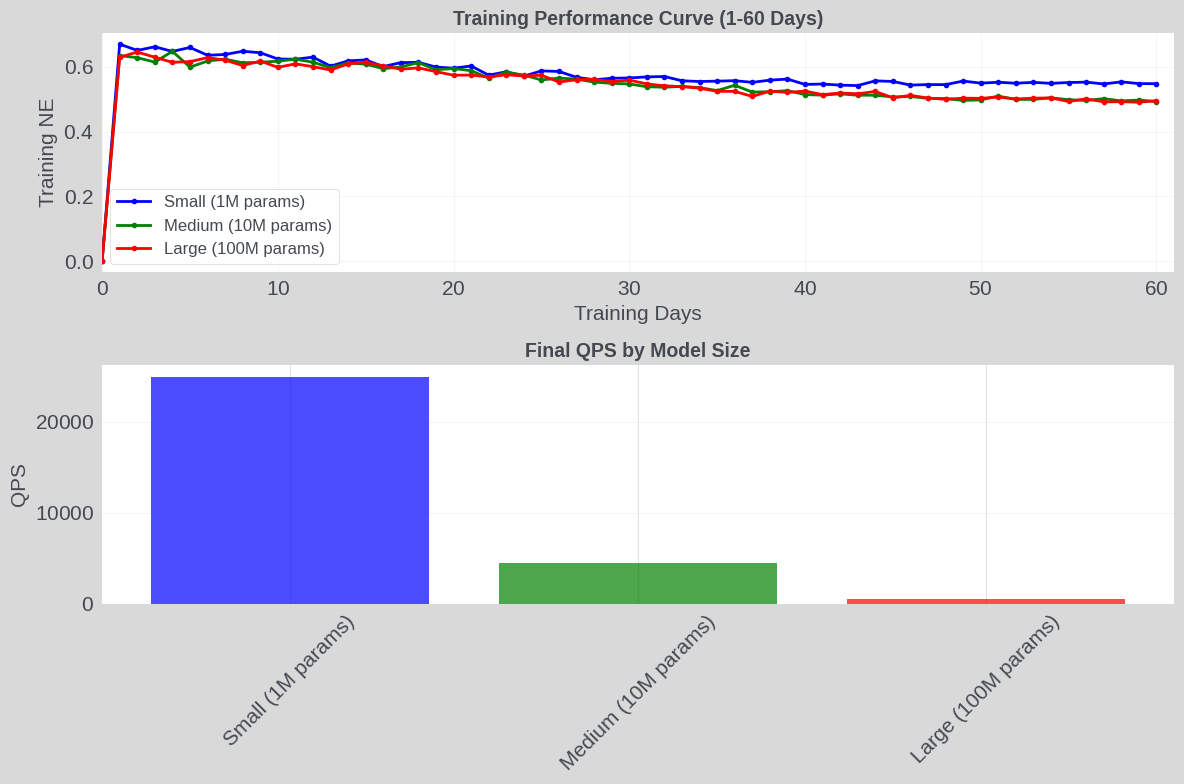

Training Performance Summary:
------------------------------------------------------------
Small (1M params):
  Day 1:  NE = 0.6704
  Day 60: NE = 0.5482, QPS = 24957
  Total Improvement: -18.2%
  Progress checkpoints:
    Day 10: NE = 0.6246
    Day 20: NE = 0.5963
    Day 30: NE = 0.5660
    Day 40: NE = 0.5460
    Day 50: NE = 0.5501

Medium (10M params):
  Day 1:  NE = 0.6349
  Day 60: NE = 0.4930, QPS = 4536
  Total Improvement: -22.4%
  Progress checkpoints:
    Day 10: NE = 0.6178
    Day 20: NE = 0.5951
    Day 30: NE = 0.5476
    Day 40: NE = 0.5147
    Day 50: NE = 0.4983

Large (100M params):
  Day 1:  NE = 0.6302
  Day 60: NE = 0.4957, QPS = 503
  Total Improvement: -21.3%
  Progress checkpoints:
    Day 10: NE = 0.5989
    Day 20: NE = 0.5745
    Day 30: NE = 0.5595
    Day 40: NE = 0.5255
    Day 50: NE = 0.5031

Budget used per model: 0.0 GPU-days
Total budget available: 8000 GPU-days


In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Import the ModelPerformanceAPI (adjust path as needed for your notebook)
from admarket.ads_copilot.common.training_simulation.model_performance_api import ModelPerformanceAPI

# Create API instance
api = ModelPerformanceAPI()

# Define different model sizes to compare
model_configs = [
    {"name": "Small (1M params)", "params_millions": 1.0, "color": "blue"},
    {"name": "Medium (10M params)", "params_millions": 10.0, "color": "green"}, 
    {"name": "Large (100M params)", "params_millions": 100.0, "color": "red"},
]

# Training days
max_training_days = 60

# Create the plot
plt.figure(figsize=(12, 8))

results_data = []

for config in model_configs:
    # Reset budget for each model to avoid budget exceeded errors
    api.reset_budget()
    
    # Train model for 60 days and get the full curve
    final_training_ne, final_qps, curve = api.train_model(
        training_days=max_training_days,
        params_millions=config["params_millions"],
        ignore_budget=True  # Ignore budget for plotting purposes
    )
    
    # Extract training days and performance values from curve
    training_days = list(curve.keys())
    training_ne_values = list(curve.values())
    
    # Store results for summary
    results_data.append({
        'config': config,
        'final_ne': final_training_ne,
        'final_qps': final_qps,
        'curve': curve
    })
    
    # Plot training curve
    plt.subplot(2, 1, 1)
    plt.plot(training_days, training_ne_values, 
             label=config["name"], color=config["color"], linewidth=2, marker='o', markersize=3)

# Plot QPS for comparison (single point since QPS doesn't change with training)
plt.subplot(2, 1, 2)
for result in results_data:
    config = result['config']
    qps = result['final_qps']
    plt.bar(config["name"], qps, color=config["color"], alpha=0.7)

# Format the plots
plt.subplot(2, 1, 1)
plt.title("Training Performance Curve (1-60 Days)", fontsize=14, fontweight='bold')
plt.xlabel("Training Days")
plt.ylabel("Training NE")
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, max_training_days + 1)

plt.subplot(2, 1, 2)
plt.title("Final QPS by Model Size", fontsize=14, fontweight='bold')
plt.ylabel("QPS")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("Training Performance Summary:")
print("-" * 60)
for result in results_data:
    config = result['config']
    curve = result['curve']
    
    day_1_ne = curve[1]
    final_ne = result['final_ne']
    final_qps = result['final_qps']
    
    print(f"{config['name']}:")
    print(f"  Day 1:  NE = {day_1_ne:.4f}")
    print(f"  Day {max_training_days}: NE = {final_ne:.4f}, QPS = {final_qps:.0f}")
    
    if day_1_ne > 0:
        improvement = ((final_ne - day_1_ne) / day_1_ne) * 100
        print(f"  Total Improvement: {improvement:.1f}%")
    
    # Show some intermediate points
    checkpoints = [10, 20, 30, 40, 50]
    print("  Progress checkpoints:")
    for day in checkpoints:
        if day in curve and day <= max_training_days:
            print(f"    Day {day}: NE = {curve[day]:.4f}")
    print()

# Print budget information
print(f"Budget used per model: {api.get_spent_budget():.1f} GPU-days")
print(f"Total budget available: {api.model_config_dict['TOTAL_BUDGET_GPU_DAYS']} GPU-days")
